# Cuboid decomposition

In [1]:
from mmt_dipole_inverse.tools import CuboidDecomposition
import mmt_dipole_inverse.tools as dpinv_tools
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

## Raw data

In [2]:
raw_cuboid_data = np.loadtxt('../../test/grain_voxel_data.txt', 
                             skiprows=1, usecols=(1,2,3))
rcd_lengths = np.ones_like(raw_cuboid_data) * 0.5
raw_cuboid_data = np.column_stack((raw_cuboid_data, rcd_lengths))
cxr, cyr, czr, cdxr, cdyr, cdzr = (raw_cuboid_data[:, i] for i in range(6))

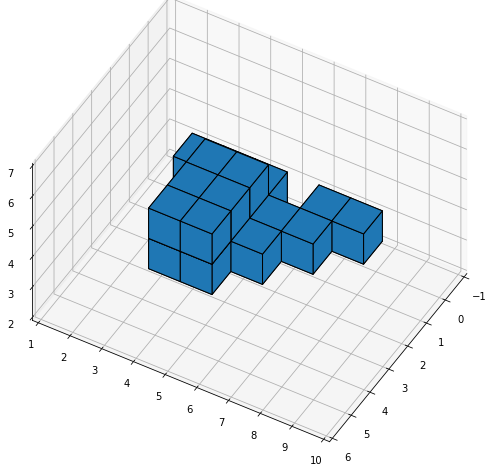

In [3]:
fig = plt.figure(figsize=(10, 8), constrained_layout=False)
# Define 3D axes
ax = plt.axes(projection='3d', proj_type='ortho')
# Here we obtain the Matplotlib collection to be plotted in our 3D system
col = dpinv_tools.plot.plotCubeAt(raw_cuboid_data[:, :3], 2 * raw_cuboid_data[:, 3:6],
                                  edgecolor="k", linewidth=1)
# We finally add it to the plot as a collection
ax.add_collection3d(col)

# ax.scatter([ctr_x], [ctr_y], [ctr_z])
offs = 2
ax.set_xlim([cxr.min() - offs, cxr.max() + offs])
ax.set_ylim([cyr.min() - offs, cyr.max() + offs])
ax.set_zlim([czr.min() - offs, czr.max() + offs])

ax.set_box_aspect((0.8, 1, 0.65), zoom=1.1)
ax.view_init(45, 30)
plt.show()

## Cuboid aggregation

In [4]:
datadir = Path('../../test/')
my_data = datadir / 'grain_voxel_data.txt'

CuboidDecomposition(my_data, 'cuboid_decomposed_data.txt',
                    format_output=True)

CuboidDecomposition(my_data, 'cuboid_decomposed_data_ufmt.txt',
                    format_output=False)

20 voxels in: [1, 3, 4], [4, 8, 5]
Time used (ms):  2
20 voxels in: [1, 3, 4], [4, 8, 5]
Time used (ms):  2


In [5]:
cuboid_data = np.loadtxt('cuboid_decomposed_data.txt', skiprows=1,delimiter=',')
cx, cy, cz, cdx, cdy, cdz = (cuboid_data[:, i] for i in range(6))

In [6]:
cuboid_data

array([[3. , 4.5, 4.5, 1.5, 1. , 1. , 1. ],
       [1. , 4. , 4. , 0.5, 1.5, 0.5, 1. ],
       [2. , 6.5, 4. , 0.5, 1. , 0.5, 1. ],
       [1. , 7.5, 4. , 0.5, 1. , 0.5, 1. ],
       [3. , 6. , 4. , 0.5, 0.5, 0.5, 1. ]])

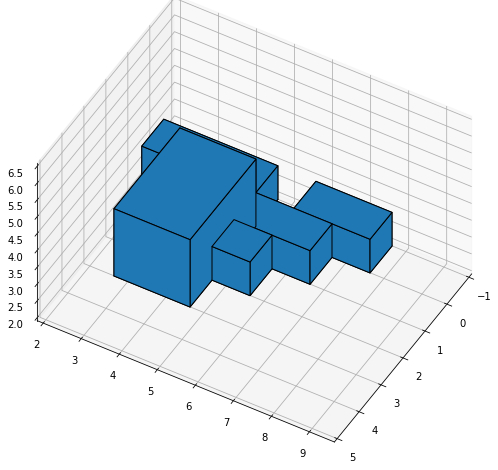

In [7]:
fig = plt.figure(figsize=(10, 8), constrained_layout=False)
# Define 3D axes
ax = plt.axes(projection='3d', proj_type='ortho')
col = dpinv_tools.plot.plotCubeAt(cuboid_data[:, :3], 2 * cuboid_data[:, 3:6],
                                  edgecolor="k", linewidth=1)
# We finally add it to the plot as a collection
ax.add_collection3d(col)

# ax.scatter([ctr_x], [ctr_y], [ctr_z])
offs = 2
ax.set_xlim([cx.min() - offs, cx.max() + offs])
ax.set_ylim([cy.min() - offs, cy.max() + offs])
ax.set_zlim([cz.min() - offs, cz.max() + offs])

ax.set_box_aspect((0.8, 1, 0.65), zoom=1.1)
ax.view_init(45, 30)
plt.show()

## Output and input files

In [13]:
!cat ../../test/grain_voxel_data.txt

   ind    x    y    z
     1    1    3    4
     1    1    4    4
     1    1    5    4
     1    1    7    4
     1    1    8    4
     1    2    4    4
     1    2    5    4
     1    2    6    4
     1    2    7    4
     1    3    4    4
     1    3    5    4
     1    3    6    4
     1    4    4    4
     1    4    5    4
     1    2    4    5
     1    2    5    5
     1    3    4    5
     1    3    5    5
     1    4    4    5
     1    4    5    5


In [9]:
!cat cuboid_decomposed_data.txt

x,y,z,dx,dy,dz,i
3.0,4.5,4.5,1.5,1.0,1.0,1
1.0,4.0,4.0,0.5,1.5,0.5,1
2.0,6.5,4.0,0.5,1.0,0.5,1
1.0,7.5,4.0,0.5,1.0,0.5,1
3.0,6.0,4.0,0.5,0.5,0.5,1


In [10]:
!cat cuboid_decomposed_data_ufmt.txt

xmin,ymin,zmin,xmax,ymax,zmax
2,4,4,4,5,5
1,3,4,1,5,4
2,6,4,2,7,4
1,7,4,1,8,4
3,6,4,3,6,4
